##(1) BA 305 Final Project Predicting Diabetes 

### It takes about **1 hour** to run all the codes in this file 
There is an time indication next to the top of the Code if it requires **more than 1 min to run**

### Helpful Tip: Use table of contents to navigate through this file

##Introduction 

Diabetes is a health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin.
Without ongoing, careful management, diabetes can lead to a buildup of sugars in the blood, which can increase the risk of dangerous complications, including stroke and heart disease. So that we decided to predict diabetes by using Machine Learning models in Python.

##Objective

1. Predict whether a person has diabetes or not
2. Find most indicative features of diabetes
3. Try different classification methods and find the method that achieves the highest accuracy score
4. Try different methods to increase the accuracy score

##Data Preprocessing

In [ ]:
# Import the python packages...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
# Import some useful packages from scikit-learn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree

In [ ]:
# We found this diabetes dataset in Kaggle
# Link of the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
# we uploaded the CSV file on github and it is more convenient for us to import datset every time 

url = 'https://raw.githubusercontent.com/JimSong66/BA-305/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(url)
diabetes_df.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   
5              0.0     0.0       0.0        1.0  18.0     0.0     0.0   
6              0.0     0.0       1.0        1.0  26.0     1.0     0.0   
7              0.0     0.0       0.0        1.0  31.0     1.0     0.0   
8              0.0     0.0       0.0        1.0  32.0     0.0     0.0   
9              0.0     0.0       0.0        1.0  27.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            0.0   
6                   0.0           1.0     1.0  ...            1.0   
7                   0.0           0.0     1.0  ...            1.0   
8                   0.0           1.0     1.0  ...            1.0   
9                   0.0           0.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   
5          0.0      2.0       7.0       0.0       0.0  0.0   1.0        4.0   
6          0.0      1.0       0.0       0.0       0.0  1.0  13.0        5.0   
7          0.0      4.0       0.0       0.0       0.0  1.0   6.0        4.0   
8          0.0      3.0       0.0       0.0       0.0  0.0   3.0        6.0   
9          0.0      3.0       0.0       6.0       0.0  1.0   6.0        4.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  
5     7.0  
6     6.0  
7     3.0  
8     8.0  
9     4.0  

[10 rows x 22 columns]

###The explaination of all columns in the dataset

**Variables:**
**Diabetes_binary:** 0 = no diabetes, 1 = prediabetes, 2 = diabetes
**High BP:** 0 = no high BP, 1 = high BP
**High Col:** 0 = no high cholesterol, 1 = high cholesterol
**CholCheck:** 0 = no cholesterol check in 5 years, 
           1 = yes cholesterol check in 5 years
**BMI:** Body Mass Index
**Smoker:** Have you smoked at least 100 cigarettes in your entire life? 
        0 = no, 1 = yes
**Stroke:** (Ever told) you had a stroke. 0 = no, 1 = yes
**HeartDiseaseorAttack:** coronary heart disease (CHD) or myocardial       infarction (MI) 0 = no, 1 = yes


**PhysActivity **: physical activity in past 30 days - not including job
                   0 = no, 1 = yes
**Fruits**: Consume Fruit 1 or more times per day 0 = no, 1 = yes
**Veggies**: Consume Vegetables 1 or more times per day 0 = no, 1 = yes
**HvyAlcoholConsump**: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no, 1 = yes
**AnyHealthcare**: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
**NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
**GenHlth**: Would you say that in general your health is: scale 1-5 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
**MentHlth**: days of poor mental health scale 1-30 days
**PhysHlth**: physical illness or injury days in past 30 days scale 1-30
**DiffWalk**: Do you have serious difficulty walking or climbing stairs? 
              0 = no, 1 = yes
**Sex**: 0 = female, 1 = male
**Age	**: 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or older
**Education**: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten, 2 = elementary etc.
Income**: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more

In [ ]:
# Look at the dataset's features datatype
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# statistical information about each feature
diabetes_df.describe().transpose()

count       mean        std   min   25%   50%   75%  \
Diabetes_binary       70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0   
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   
Veggies               70692.0   0.788774   0.408181   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     70692.0   0.042721   0.202228   0.0   0.0   0.0   0.0   
AnyHealthcare         70692.0   0.954960   0.207394   0.0   1.0   1.0   1.0   
NoDocbcCost           70692.0   0.093914   0.291712   0.0   0.0   0.0   0.0   
GenHlth               70692.0   2.837082   1.113565   1.0   2.0   3.0   4.0   
MentHlth              70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0   
PhysHlth              70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0   
DiffWalk              70692.0   0.252730   0.434581   0.0   0.0   0.0   1.0   
Sex                   70692.0   0.456997   0.498151   0.0   0.0   0.0   1.0   
Age                   70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0   
Education             70692.0   4.920953   1.029081   1.0   4.0   5.0   6.0   
Income                70692.0   5.698311   2.175196   1.0   4.0   6.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [ ]:
# check the number of null values in the dataset
diabetes_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# get rid of the space within each column's name
diabetes_df.columns = ('Diabetes_binary',	'HighBP',	'HighChol',	'CholCheck',	'BMI',	'Smoker',	'Stroke',	'HeartDiseaseorAttack',	'PhysActivity',
                       'Fruits',	'Veggies',	'HvyAlcoholConsump',	'AnyHealthcare',	'NoDocbcCost',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Sex',	'Age',	'Education',	'Income')

diabetes_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# remove any missing data in the dataset
di_mdf = diabetes_df.dropna(how='any')
di_mdf = di_mdf.reset_index(drop=True)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# check the number of people with diabetes and people without diabetes in the dataset
# this dataset is 50-50 split in diabetes_binary
diabetes_df['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
# Give shortcut on columnsnames
columnsnames = diabetes_df.drop('Diabetes_binary',axis=1).columns
columnsnames

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

###Visualization - Heat Map

In [ ]:
# Calculate the correlation between each variable in the original dataset
corr_mat = diabetes_df.corr()
corr_mat

Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
HighBP                       0.381516  1.000000  0.316515   0.103283   
HighChol                     0.289213  0.316515  1.000000   0.085981   
CholCheck                    0.115382  0.103283  0.085981   1.000000   
BMI                          0.293373  0.241019  0.131309   0.045648   
Smoker                       0.085999  0.087438  0.093398  -0.004331   
Stroke                       0.125427  0.129060  0.099786   0.022529   
HeartDiseaseorAttack         0.211523  0.210750  0.181187   0.043497   
PhysActivity                -0.158666 -0.136102 -0.090453  -0.008249   
Fruits                      -0.054077 -0.040852 -0.047384   0.017384   
Veggies                     -0.079293 -0.066624 -0.042836   0.000349   
HvyAlcoholConsump           -0.094853 -0.027030 -0.025443  -0.027146   
AnyHealthcare                0.023191  0.035764  0.031532   0.106800   
NoDocbcCost                  0.040977  0.026517  0.033199  -0.062669   
GenHlth                      0.407612  0.320540  0.237778   0.059213   
MentHlth                     0.087029  0.064294  0.083881  -0.010660   
PhysHlth                     0.213081  0.173922  0.142610   0.034540   
DiffWalk                     0.272646  0.234784  0.162043   0.044430   
Sex                          0.044413  0.040819  0.017324  -0.007991   
Age                          0.278738  0.338132  0.240338   0.101743   
Education                   -0.170481 -0.141643 -0.084386  -0.008695   
Income                      -0.224449 -0.187657 -0.107777   0.007550   

                           BMI    Smoker    Stroke  HeartDiseaseorAttack  \
Diabetes_binary       0.293373  0.085999  0.125427              0.211523   
HighBP                0.241019  0.087438  0.129060              0.210750   
HighChol              0.131309  0.093398  0.099786              0.181187   
CholCheck             0.045648 -0.004331  0.022529              0.043497   
BMI                   1.000000  0.011551  0.022931              0.060355   
Smoker                0.011551  1.000000  0.064658              0.124418   
Stroke                0.022931  0.064658  1.000000              0.223394   
HeartDiseaseorAttack  0.060355  0.124418  0.223394              1.000000   
PhysActivity         -0.170936 -0.079823 -0.079985             -0.098223   
Fruits               -0.084505 -0.074811 -0.008996             -0.019436   
Veggies              -0.056528 -0.029926 -0.047601             -0.036315   
HvyAlcoholConsump    -0.058232  0.077835 -0.023395             -0.037130   
AnyHealthcare        -0.013417 -0.012939  0.006484              0.015687   
NoDocbcCost           0.065832  0.035799  0.036198              0.036029   
GenHlth               0.267888  0.152416  0.189447              0.275868   
MentHlth              0.104682  0.091257  0.087303              0.075057   
PhysHlth              0.161862  0.120698  0.164488              0.198416   
DiffWalk              0.246094  0.119789  0.192266              0.232611   
Sex                   0.000827  0.112125  0.003822              0.098161   
Age                  -0.038648  0.105424  0.123879              0.221878   
Education            -0.100233 -0.140966 -0.073926             -0.096559   
Income               -0.124878 -0.104725 -0.136577             -0.146748   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Diabetes_binary          -0.158666 -0.054077  ...       0.023191     0.040977   
HighBP                   -0.136102 -0.040852  ...       0.035764     0.026517   
HighChol                 -0.090453 -0.047384  ...       0.031532     0.033199   
CholCheck                -0.008249  0.017384  ...       0.106800    -0.062669   
BMI                      -0.170936 -0.084505  ...      -0.013417     0.065832   
Smoker                   -0.079823 -0.074811  ...      -0.012939     0.035799   
Stroke                   -0.079985 -0.008996  ...

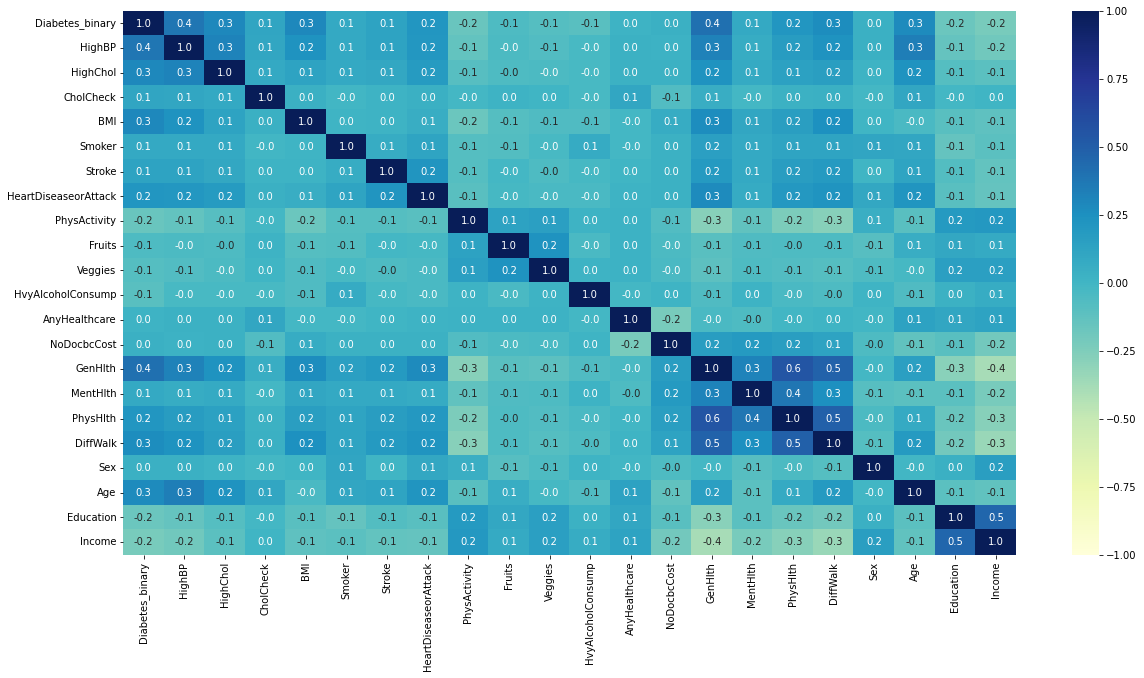

In [ ]:
# Plot the heat map of the original dataset
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True, fmt =".1f", vmin=-1, vmax=1,cmap='YlGnBu')

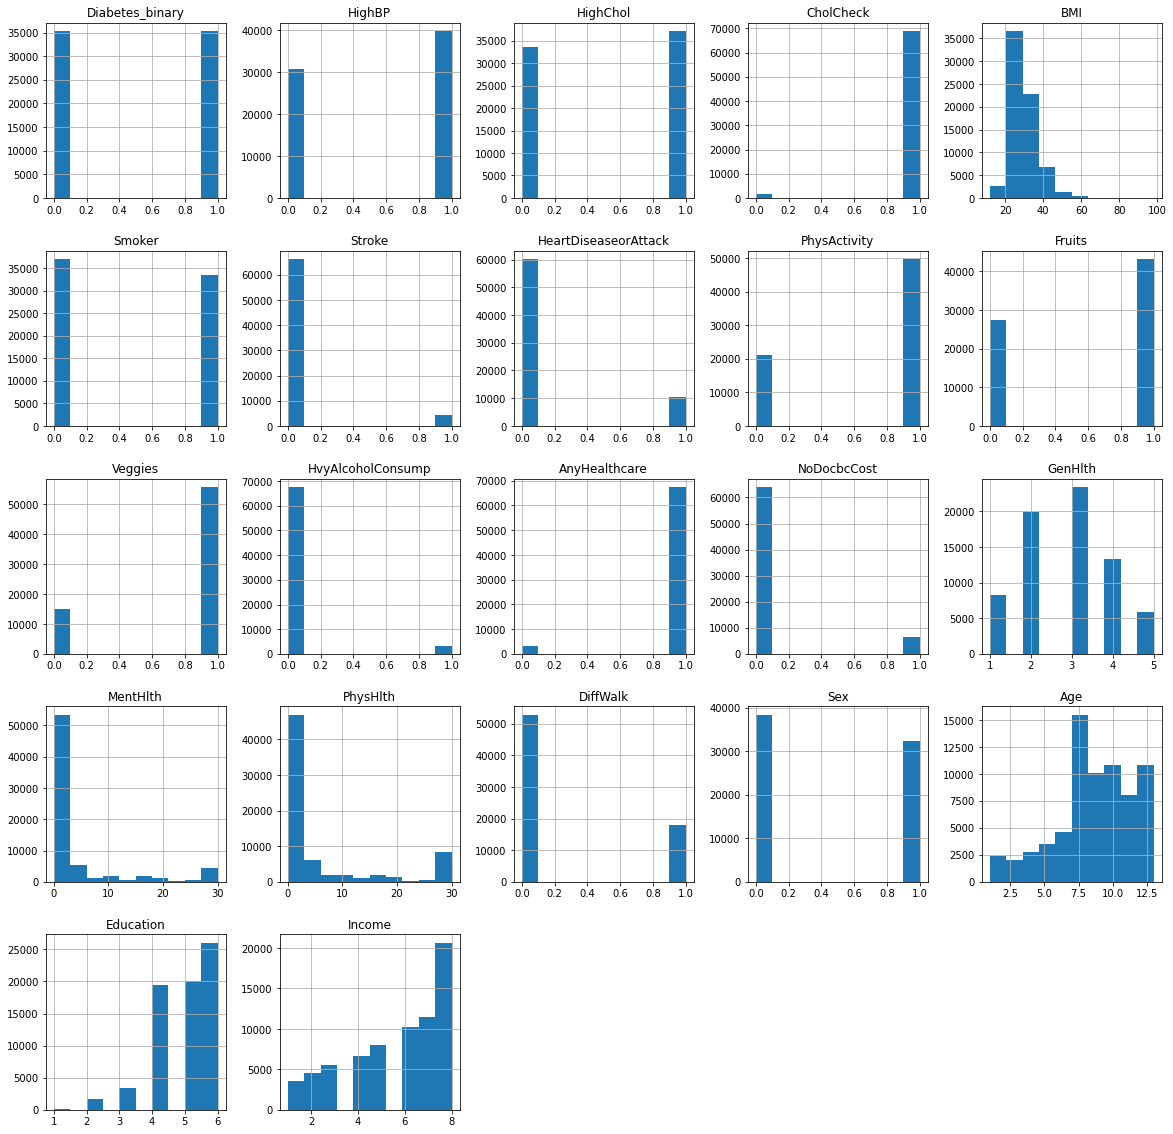

In [ ]:
# plotting the data distributions of all variables
p = diabetes_df.hist(figsize = (20,20))

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64


Text(0.5, 1.0, 'The bar graph of the diabetes_binary in the dataset ')

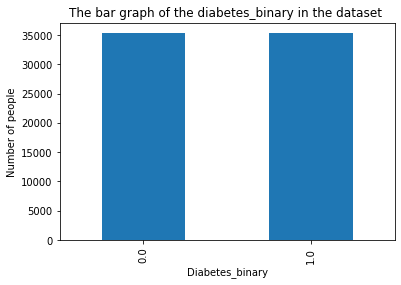

In [ ]:
# Plot the bar graph of the diabetes_binary column in the dataset to check the 50/50 split
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df['Diabetes_binary'].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Diabetes_binary.value_counts())
p=diabetes_df.Diabetes_binary.value_counts().plot(kind="bar")
plt.xlabel('Diabetes_binary')
plt.ylabel('Number of people')
plt.title('The bar graph of the diabetes_binary in the dataset ')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


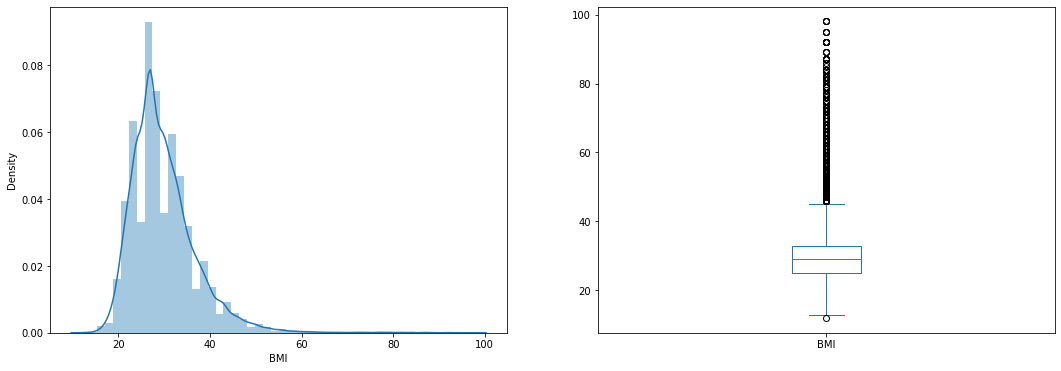

In [ ]:
# To see the distribution of BMI and plot the boxplot
plt.subplot(121), sns.distplot(diabetes_df['BMI'])
plt.subplot(122), diabetes_df['BMI'].plot.box(figsize=(18,6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


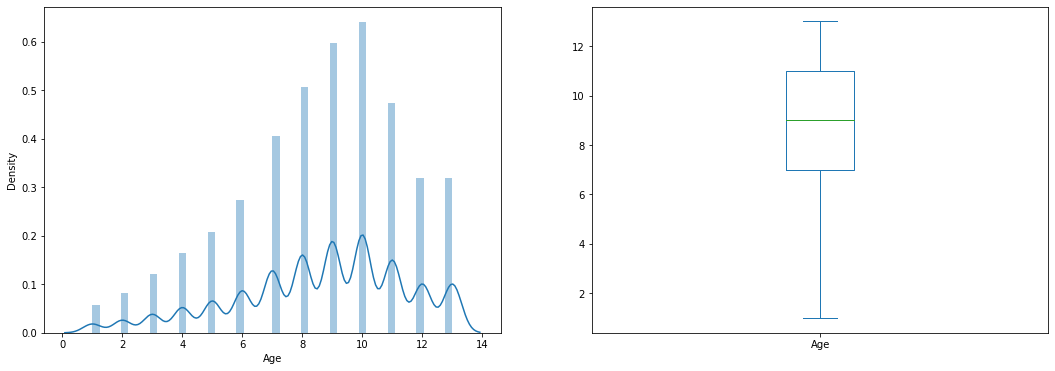

In [ ]:
# To see the distribution of Age and plot the boxplot
plt.subplot(121), sns.distplot(diabetes_df['Age'])
plt.subplot(122), diabetes_df['Age'].plot.box(figsize=(18,6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


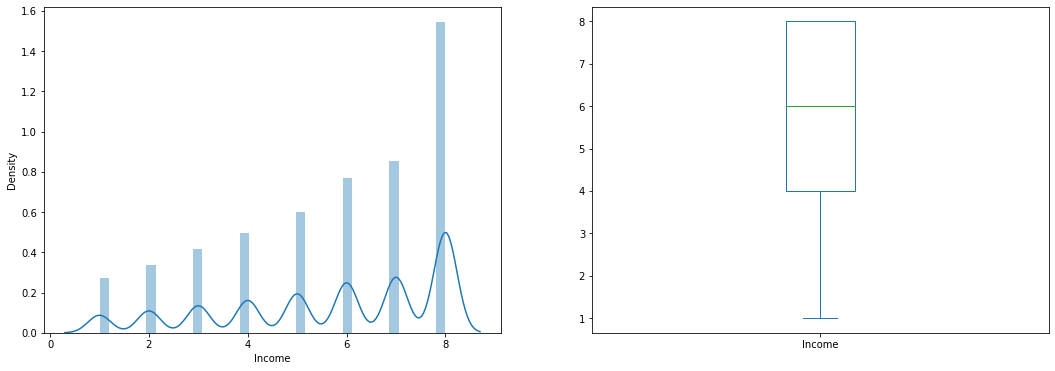

In [ ]:
# To see the distribution of Income and plot the boxplot
plt.subplot(121), sns.distplot(diabetes_df['Income'])
plt.subplot(122), diabetes_df['Income'].plot.box(figsize=(18,6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


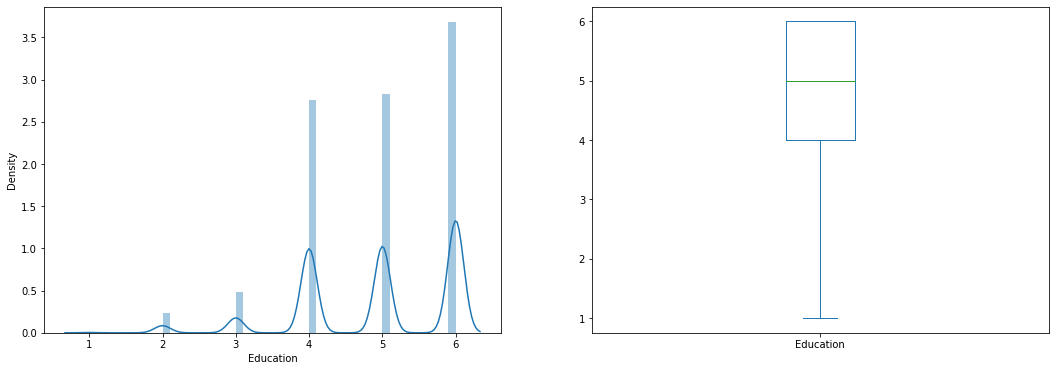

In [ ]:
# To see the distribution of Education and plot the boxplot
plt.subplot(121), sns.distplot(diabetes_df['Education'])
plt.subplot(122), diabetes_df['Education'].plot.box(figsize=(18,6))
plt.show()

## KNN Model on the original dataset

In [ ]:
# Separate data into X (input/predictors) and y (target) split the dataframe
X = diabetes_df.drop('Diabetes_binary',axis=1).values #axis = 1 means the entire column
y = diabetes_df['Diabetes_binary'].values
X

array([[ 1.,  0.,  1., ...,  4.,  6.,  8.],
       [ 1.,  1.,  1., ..., 12.,  6.,  8.],
       [ 0.,  0.,  1., ..., 13.,  6.,  8.],
       ...,
       [ 1.,  1.,  1., ..., 13.,  6.,  4.],
       [ 1.,  1.,  1., ..., 11.,  2.,  4.],
       [ 1.,  1.,  1., ...,  9.,  6.,  2.]])

In [ ]:
# Use train/test split function
# stratify function ensures the training and testing data have the same
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2, stratify=y)
print('Training set:', X_train.shape, 'Testing set:', X_test.shape)

Training set: (49484, 21) Testing set: (21208, 21)


In [ ]:
# Standardize training and validation features using 'StandatdScaler()'
# the first line defines the scaling object
scaler = preprocessing.StandardScaler()

# the second line specifies which data to use to compute means and variances
scaler.fit(X_train)

# the third line scales the data using the means and variances computed in the previous step
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**These line takes a while to run!**

In [ ]:
# Choosing the best k for the validation set (Take about 7 mins 10s)
# using a 'for' loop and range(start, stop, step)
# These line could take a while to run!!!
results = []
for k in range(1, 101, 5):

    print('iteration', k, "of", 101)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

iteration 1 of 101
iteration 6 of 101
iteration 11 of 101
iteration 16 of 101
iteration 21 of 101
iteration 26 of 101
iteration 31 of 101
iteration 36 of 101
iteration 41 of 101
iteration 46 of 101
iteration 51 of 101
iteration 56 of 101
iteration 61 of 101
iteration 66 of 101
iteration 71 of 101
iteration 76 of 101
iteration 81 of 101
iteration 86 of 101
iteration 91 of 101
iteration 96 of 101


k  accuracy
0    1  0.667625
1    6  0.701669
2   11  0.728452
3   16  0.731092
4   21  0.737127
5   26  0.735854
6   31  0.739014
7   36  0.739249
8   41  0.740900
9   46  0.741796
10  51  0.741135
11  56  0.740240
12  61  0.741654
13  66  0.740051
14  71  0.740664
15  76  0.740240
16  81  0.742220
17  86  0.741277
18  91  0.740947
19  96  0.741418

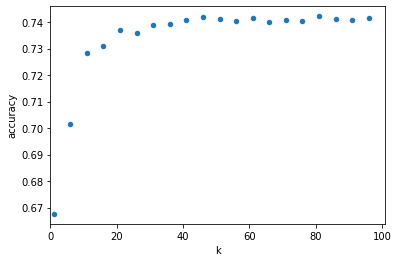

In [ ]:
# plot accuracy vs. k
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 101]);

In [ ]:
# Show the confusion matrix and accuracy for the validation data, using k = 81 (optimal k value we found in previous step) (Take 21s)
knn = KNeighborsClassifier(n_neighbors=81)
knn.fit(X_train_scaled, y_train)

y_knnpred = knn.predict(X_test_scaled)

# To see the model performance by computing the accuracy score
print(confusion_matrix(y_test, y_knnpred))
print('Accuracy Score:', accuracy_score(y_test, y_knnpred))
print(classification_report(y_test,y_knnpred))

[[7381 3223]
 [2244 8360]]
Accuracy Score: 0.7422199170124482
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10604
         1.0       0.72      0.79      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



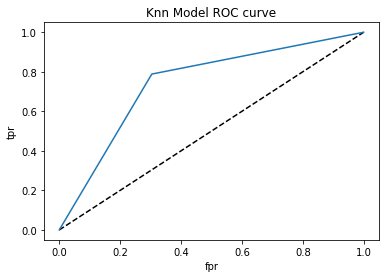

In [ ]:
# extract roc curve values
fpr, tpr, thresholds = roc_curve(y_test, y_knnpred)

# plot roc curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn Model ROC curve')
plt.show()

In [ ]:
#Area under ROC curve (1 is best)
roc_auc_score(y_test,y_knnpred)


0.742219917012448

###PCA on Original dataset


In [ ]:
# Separate data into X (input/predictors) and y (target) split the dataframe
# drop the output column (Diabetes_binary) from the dataset before PCA analysis
X = diabetes_df.drop(['Diabetes_binary'],axis=1).values #axis = 1 means the entire column
X

array([[ 1.,  0.,  1., ...,  4.,  6.,  8.],
       [ 1.,  1.,  1., ..., 12.,  6.,  8.],
       [ 0.,  0.,  1., ..., 13.,  6.,  8.],
       ...,
       [ 1.,  1.,  1., ..., 13.,  6.,  4.],
       [ 1.,  1.,  1., ..., 11.,  2.,  4.],
       [ 1.,  1.,  1., ...,  9.,  6.,  2.]])

In [ ]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function
scaled_array = preprocessing.scale(X)
print(scaled_array)

# It is better to convert the array back to a dataframe to help with visualization of the data
scaled_df = pd.DataFrame(scaled_array)
print(scaled_df)


[[ 0.88020109 -1.05279808  0.15927581 ... -1.60723742  1.04856175
   1.05815996]
 [ 0.88020109  0.94984976  0.15927581 ...  1.19768093  1.04856175
   1.05815996]
 [-1.13610402 -1.05279808  0.15927581 ...  1.54829572  1.04856175
   1.05815996]
 ...
 [ 0.88020109  0.94984976  0.15927581 ...  1.54829572  1.04856175
  -0.78076781]
 [ 0.88020109  0.94984976  0.15927581 ...  0.84706614 -2.83842972
  -0.78076781]
 [ 0.88020109  0.94984976  0.15927581 ...  0.14583655  1.04856175
  -1.70023169]]
             0         1         2         3         4         5         6   \
0      0.880201 -1.052798  0.159276 -0.542176 -0.951711 -0.257473 -0.416470   
1      0.880201  0.949850  0.159276 -0.542176  1.050740  3.883895 -0.416470   
2     -1.136104 -1.052798  0.159276 -0.542176 -0.951711 -0.257473 -0.416470   
3      0.880201  0.949850  0.159276 -0.261036  1.050740 -0.257473 -0.416470   
4     -1.136104 -1.052798  0.159276 -0.120466  1.050740 -0.257473 -0.416470   
...         ...       ...       ..

In [ ]:
#Checking the result
pd.DataFrame({
              'mean':scaled_df.mean(),
              'stdev': scaled_df.std()
              }).transpose().round(3)

0    1    2    3    4    5    6    7    8    9   ...   11   12   13  \
mean  -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  ... -0.0  0.0  0.0   
stdev  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

        14   15   16   17   18   19   20  
mean   0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  
stdev  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 21 columns]

In [ ]:
# Run PCA after scaling and we arbitrary use the number of components to be 16
pcs = PCA(n_components=16)
pcs.fit(scaled_df)

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.transpose().round(3)

0      1      2      3      4      5      6   \
Proportion of variance  0.173  0.083  0.064  0.057  0.056  0.051  0.049   
Cumulative proportion   0.173  0.256  0.319  0.377  0.433  0.484  0.533   

                           7      8      9      10     11     12     13  \
Proportion of variance  0.045  0.044  0.041  0.039  0.038  0.035  0.035   
Cumulative proportion   0.578  0.622  0.664  0.703  0.740  0.776  0.811   

                           14     15  
Proportion of variance  0.034  0.033  
Cumulative proportion   0.845  0.878

In [ ]:
# let's first recover the names of the columns in the metric dataframe
var = list(diabetes_df.columns)

In [ ]:
# Component matrix (correlations)
pd.DataFrame(pcs.components_.transpose(), index=columnsnames).round(2)

0     1     2     3     4     5     6     7     8   \
HighBP                0.26 -0.32  0.07 -0.06  0.04  0.33  0.18 -0.01  0.16   
HighChol              0.20 -0.28  0.05  0.04  0.02  0.32  0.21 -0.18  0.18   
CholCheck             0.05 -0.24 -0.08 -0.12  0.24 -0.03  0.17 -0.63 -0.54   
BMI                   0.19  0.03  0.01 -0.05  0.46  0.40  0.09  0.25  0.03   
Smoker                0.14 -0.05  0.24  0.33 -0.26 -0.20  0.30  0.24 -0.37   
Stroke                0.17 -0.12 -0.06  0.17 -0.23 -0.14 -0.43 -0.31  0.29   
HeartDiseaseorAttack  0.22 -0.24  0.03  0.25 -0.22  0.04 -0.29 -0.06  0.04   
PhysActivity         -0.24 -0.07 -0.12  0.14 -0.19  0.18 -0.02 -0.25 -0.20   
Fruits               -0.09 -0.14 -0.53 -0.02 -0.28  0.11  0.04  0.17 -0.11   
Veggies              -0.12 -0.10 -0.48  0.20 -0.16  0.18  0.21  0.25 -0.12   
HvyAlcoholConsump    -0.04  0.06  0.12  0.34 -0.08 -0.22  0.63 -0.18  0.40   
AnyHealthcare        -0.03 -0.35 -0.12 -0.01  0.33 -0.45  0.01  0.07 -0.02   
NoDocbcCost           0.13  0.37 -0.06  0.14 -0.15  0.35  0.02 -0.27  0.02   
GenHlth               0.40  0.03 -0.08  0.09  0.08  0.01 -0.02  0.05 -0.08   
MentHlth              0.23  0.28 -0.22  0.26  0.14 -0.14  0.05 -0.15 -0.08   
PhysHlth              0.35  0.10 -0.23  0.22  0.14 -0.17 -0.07  0.05 -0.08   
DiffWalk              0.36  0.00 -0.18  0.03  0.09 -0.12 -0.05  0.14  0.03   
Sex                  -0.03 -0.15  0.42  0.44  0.03  0.19 -0.22  0.16 -0.32   
Age                   0.16 -0.48  0.01 -0.19 -0.25 -0.07  0.07  0.07  0.11   
Education            -0.25 -0.13 -0.20  0.36  0.30  0.08 -0.13 -0.07  0.25   
Income               -0.32 -0.18 -0.01  0.32  0.27  0.05 -0.05  0.03  0.09   

                        9     10    11    12    13    14    15  
HighBP               -0.04  0.10 -0.09  0.10  0.10 -0.09  0.22  
HighChol             -0.43 -0.02  0.21  0.11 -0.27 -0.05 -0.35  
CholCheck             0.31 -0.20  0.05 -0.01 -0.03  0.02  0.02  
BMI                   0.35  0.36  0.15  0.02  0.14  0.23 -0.06  
Smoker               -0.09  0.01  0.51  0.13  0.23  0.26  0.09  
Stroke                0.34  0.30  0.40  0.25  0.01 -0.24  0.04  
HeartDiseaseorAttack  0.12 -0.06 -0.16 -0.49 -0.05  0.51 -0.35  
PhysActivity         -0.28  0.61 -0.24 -0.05  0.05  0.21  0.37  
Fruits                0.16 -0.06 -0.23  0.53  0.22  0.13 -0.35  
Veggies               0.16  0.03  0.24 -0.44 -0.30 -0.37  0.06  
HvyAlcoholConsump     0.33  0.09 -0.31 -0.01 -0.01 -0.00 -0.04  
AnyHealthcare        -0.22  0.31 -0.03 -0.22  0.43 -0.25 -0.31  
NoDocbcCost          -0.11 -0.20  0.04 -0.23  0.64 -0.25 -0.08  
GenHlth              -0.01  0.02 -0.15 -0.01 -0.07 -0.04  0.08  
MentHlth             -0.32  0.10 -0.00  0.19 -0.24  0.02 -0.18  
PhysHlth             -0.09 -0.11 -0.19  0.07 -0.09 -0.05  0.20  
DiffWalk              0.10 -0.08 -0.09 -0.04  0.09  0.05  0.28  
Sex                   0.11 -0.01 -0.34  0.16 -0.04 -0.41 -0.09  
Age                  -0.12 -0.23 -0.11  0.00  0.09 -0.07  0.29  
Education            -0.11 -0.28  0.10  0.05  0.14  0.22  0.27  
Income               -0.00 -0.21  0.10  0.09  0.00  0.05  0.02

In [ ]:
#Eigenvalues are given by the PCA explained_variance_ function
eig=pcs.explained_variance_.round(2)
print(eig)

[3.64 1.73 1.33 1.2  1.18 1.08 1.03 0.94 0.93 0.87 0.82 0.79 0.74 0.74
 0.71 0.7 ]


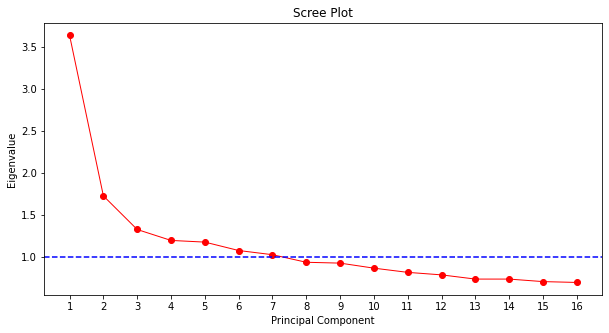

In [ ]:
# scree plot of eigenvalues
# define the x values, which is a simple array between 1 and 16
xvals = np.arange(1,17,step=1);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue
plt.axhline(y=1, color='b', linestyle='--')

### Keep the first 7 components for PCA result based on latent root criterion

In [ ]:
# Keeping the first 7 components based on latent root criterion
# fit() function runs the PCA and shows the % of var explained
# fit_transform() function runs the PCA and shows the actual PCA values (the components score)
pcs = PCA(n_components=7)
principalComponents = pcs.fit_transform(scaled_df)

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        principalComponents.round(3), 
        columns = ['F1','F2','F3','F4','F5','F6','F7']
        )
principalDF

F1     F2     F3     F4     F5     F6     F7
0     -0.663  0.562 -0.259  1.599  1.757  0.012 -0.843
1      0.632 -2.255  1.273  0.973 -0.591 -0.674 -1.701
2     -2.420 -0.982 -0.703  0.354 -0.015 -0.349 -0.806
3     -0.793 -1.965  0.050  1.136 -0.175  0.872  0.541
4     -2.022  0.105 -0.695 -0.068 -0.439 -0.685  0.311
...      ...    ...    ...    ...    ...    ...    ...
70687  0.906  1.171  0.428 -2.065  0.716  0.069  0.387
70688  1.170 -1.204  0.689  0.171 -1.229 -0.454 -0.276
70689  2.922 -1.358 -0.525 -0.619  0.114 -0.569 -0.893
70690  2.366 -0.072  1.655 -3.027 -0.480 -1.352  0.148
70691  0.129 -1.254  0.212 -1.126 -0.816  0.419 -0.839

[70692 rows x 7 columns]

In [ ]:
# confirm component scores are orthogonal (small correlations)
principalDF.corr().round(4)

F1   F2   F3   F4   F5   F6   F7
F1  1.0  0.0 -0.0  0.0  0.0  0.0 -0.0
F2  0.0  1.0  0.0 -0.0  0.0 -0.0 -0.0
F3 -0.0  0.0  1.0  0.0 -0.0  0.0  0.0
F4  0.0 -0.0  0.0  1.0 -0.0 -0.0  0.0
F5  0.0  0.0 -0.0 -0.0  1.0  0.0 -0.0
F6  0.0 -0.0  0.0 -0.0  0.0  1.0  0.0
F7 -0.0 -0.0  0.0  0.0 -0.0  0.0  1.0

In [ ]:
# merge component scores with the original dataframe (after missing values are dropped)
# we will use the concatenate, concat() function
diabetes_df_aug = pd.concat([diabetes_df, principalDF], axis=1)
diabetes_df_aug

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...   Age  Education  \
0                       0.0           1.0     0.0  ...   4.0        6.0   
1                       0.0           0.0     1.0  ...  12.0        6.0   
2                       0.0           1.0     1.0  ...  13.0        6.0   
3                       0.0           1.0     1.0  ...  11.0        6.0   
4                       0.0           1.0     1.0  ...   8.0        5.0   
...                     ...           ...     ...  ...   ...        ...   
70687                   0.0           0.0     0.0  ...   6.0        4.0   
70688                   1.0           0.0     1.0  ...  10.0        3.0   
70689                   1.0           0.0     1.0  ...  13.0        6.0   
70690                   0.0           0.0     0.0  ...  11.0        2.0   
70691                   1.0           1.0     1.0  ...   9.0        6.0   

       Income     F1     F2     F3     F4     F5     F6     F7  
0         8.0 -0.663  0.562 -0.259  1.599  1.757  0.012 -0.843  
1         8.0  0.632 -2.255  1.273  0.973 -0.591 -0.674 -1.701  
2         8.0 -2.420 -0.982 -0.703  0.354 -0.015 -0.349 -0.806  
3         8.0 -0.793 -1.965  0.050  1.136 -0.175  0.872  0.541  
4         8.0 -2.022  0.105 -0.695 -0.068 -0.439 -0.685  0.311  
...       ...    ...    ...    ...    ...    ...    ...    ...  
70687     1.0  0.906  1.171  0.428 -2.065  0.716  0.069  0.387  
70688     6.0  1.170 -1.204  0.689  0.171 -1.229 -0.454 -0.276  
70689     4.0  2.922 -1.358 -0.525 -0.619  0.114 -0.569 -0.893  
70690     4.0  2.366 -0.072  1.655 -3.027 -0.480 -1.352  0.148  
70691     2.0  0.129 -1.254  0.212 -1.126 -0.816  0.419 -0.839  

[70692 rows x 29 columns]

In [ ]:
# Separate data into Xp (input/predictors) and yp (target) split the dataframe
Xp = diabetes_df_aug.drop(['Diabetes_binary','HighBP','HighChol','HighChol','CholCheck','BMI','Smoker','Stroke',
                     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',
                     'NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income'],axis=1).values #axis = 1 means the entire column
yp = diabetes_df_aug['Diabetes_binary'].values

In [ ]:
# Use train/test split function
# stratify function ensures the training and testing data have the same
# proportion of positive and negative outcomes (0's and 1's for vector yp)
# X7 and y7 are PCA result
X7_train,X7_test,y7_train,y7_test = train_test_split(Xp,yp, test_size=0.3, random_state=2, stratify=yp)
print('Training set:', X7_train.shape, 'Testing set:', X7_test.shape)

Training set: (49484, 7) Testing set: (21208, 7)


### **These lines of code could take a while to run!**

In [ ]:
# Choosing the best k for the validation set (Take about 2 mins 30S)
# using a 'for' loop and range(start, stop, step)
results = []
for k in range(1, 300, 10):

    print('iteration', k, "of", 300)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X7_train, y7_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y7_test, knn.predict(X7_test))
        })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

iteration 1 of 300
iteration 11 of 300
iteration 21 of 300
iteration 31 of 300
iteration 41 of 300
iteration 51 of 300
iteration 61 of 300
iteration 71 of 300
iteration 81 of 300
iteration 91 of 300
iteration 101 of 300
iteration 111 of 300
iteration 121 of 300
iteration 131 of 300
iteration 141 of 300
iteration 151 of 300
iteration 161 of 300
iteration 171 of 300
iteration 181 of 300
iteration 191 of 300
iteration 201 of 300
iteration 211 of 300
iteration 221 of 300
iteration 231 of 300
iteration 241 of 300
iteration 251 of 300
iteration 261 of 300
iteration 271 of 300
iteration 281 of 300
iteration 291 of 300


k  accuracy
0     1  0.662439
1    11  0.728357
2    21  0.737882
3    31  0.738684
4    41  0.740758
5    51  0.742927
6    61  0.743163
7    71  0.744059
8    81  0.742550
9    91  0.742126
10  101  0.742409
11  111  0.742173
12  121  0.742833
13  131  0.742126
14  141  0.743257
15  151  0.743682
16  161  0.742833
17  171  0.742644
18  181  0.742880
19  191  0.742833
20  201  0.742833
21  211  0.743304
22  221  0.742880
23  231  0.743210
24  241  0.742739
25  251  0.742786
26  261  0.743304
27  271  0.742644
28  281  0.742644
29  291  0.742456

In [ ]:
# Run the k-NN model with k=11 about the neighboors
knn = KNeighborsClassifier(n_neighbors=91)
# Specify the training features (X7_train) and the outcome they lead to (y7_train)
# Important: only use the training data at this step. Do not use test data.
knn.fit(X7_train, y7_train)

# Now that the model is done, we can use it to predict whether the new customers
# from the testing data, will accept a loan or not. For this, we feed the
# testing features X_test into the prediction function.
y7_pred = knn.predict(X7_test)
print('Accuracy:', accuracy_score(y7_test, y7_pred))

Accuracy: 0.7421256129762354




### Keep 11 components for PCA result based on percentage of variance criterion

In [ ]:
# Keeping the first 11 components based on latent root criterion
pcs11 = PCA(n_components=11)
principalComponents11 = pcs11.fit_transform(scaled_df)

# make the output more readable by creating a new dataframe
principalDF11 = pd.DataFrame(
        principalComponents11.round(3), 
        columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11']
        )
principalDF11

F1     F2     F3     F4     F5     F6     F7     F8     F9    F10  \
0     -0.663  0.563 -0.228  1.611  1.839 -0.053 -0.915 -0.228 -0.450 -0.282   
1      0.632 -2.297  1.352  0.881 -0.567 -0.587 -1.663 -0.998  1.478  0.726   
2     -2.420 -0.996 -0.670  0.346 -0.122 -0.308 -0.832  0.253 -0.302  0.120   
3     -0.793 -1.979  0.074  1.094 -0.169  0.910  0.551  0.425 -0.504 -0.764   
4     -2.022  0.106 -0.694 -0.051 -0.423 -0.700  0.304  0.459 -0.815  0.292   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
70687  0.906  1.200  0.369 -2.056  0.803 -0.025  0.399  0.107  0.249  0.460   
70688  1.171 -1.186  0.628  0.232 -1.314 -0.471 -0.247  1.272 -0.953  0.954   
70689  2.923 -1.340 -0.583 -0.597  0.172 -0.578 -0.821 -0.615  1.451 -0.832   
70690  2.366 -0.087  1.671 -3.034 -0.404 -1.310  0.210 -0.580  0.705 -0.702   
70691  0.129 -1.230  0.165 -1.115 -0.838  0.353 -0.847 -1.480  1.030 -0.888   

         F11  
0      0.084  
1     -0.630  
2     -0.857  
3     -0.310  
4      0.131  
...      ...  
70687  0.405  
70688 -1.067  
70689 -1.746  
70690 -0.772  
70691  0.051  

[70692 rows x 11 columns]

In [ ]:
# confirm component scores are orthogonal (small correlations)
principalDF11.corr().round(4)

F1   F2   F3   F4   F5   F6   F7   F8   F9  F10  F11
F1   1.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0
F2   0.0  1.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0
F3   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0
F4  -0.0 -0.0  0.0  1.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0
F5  -0.0 -0.0  0.0 -0.0  1.0  0.0  0.0 -0.0  0.0  0.0 -0.0
F6   0.0 -0.0  0.0  0.0  0.0  1.0 -0.0  0.0 -0.0 -0.0  0.0
F7   0.0 -0.0  0.0 -0.0  0.0 -0.0  1.0 -0.0  0.0  0.0  0.0
F8   0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  1.0  0.0 -0.0  0.0
F9  -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  1.0  0.0  0.0
F10 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  1.0 -0.0
F11  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0  1.0

In [ ]:
# merge component scores with the original dataframe (after missing values are dropped)
# we will use the concatenate, concat() function
diabetes11_df_aug = pd.concat([diabetes_df, principalDF11], axis=1)
diabetes11_df_aug

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...     F2     F3     F4  \
0                       0.0           1.0     0.0  ...  0.563 -0.228  1.611   
1                       0.0           0.0     1.0  ... -2.297  1.352  0.881   
2                       0.0           1.0     1.0  ... -0.996 -0.670  0.346   
3                       0.0           1.0     1.0  ... -1.979  0.074  1.094   
4                       0.0           1.0     1.0  ...  0.106 -0.694 -0.051   
...                     ...           ...     ...  ...    ...    ...    ...   
70687                   0.0           0.0     0.0  ...  1.200  0.369 -2.056   
70688                   1.0           0.0     1.0  ... -1.186  0.628  0.232   
70689                   1.0           0.0     1.0  ... -1.340 -0.583 -0.597   
70690                   0.0           0.0     0.0  ... -0.087  1.671 -3.034   
70691                   1.0           1.0     1.0  ... -1.230  0.165 -1.115   

          F5     F6     F7     F8     F9    F10    F11  
0      1.839 -0.053 -0.915 -0.228 -0.450 -0.282  0.084  
1     -0.567 -0.587 -1.663 -0.998  1.478  0.726 -0.630  
2     -0.122 -0.308 -0.832  0.253 -0.302  0.120 -0.857  
3     -0.169  0.910  0.551  0.425 -0.504 -0.764 -0.310  
4     -0.423 -0.700  0.304  0.459 -0.815  0.292  0.131  
...      ...    ...    ...    ...    ...    ...    ...  
70687  0.803 -0.025  0.399  0.107  0.249  0.460  0.405  
70688 -1.314 -0.471 -0.247  1.272 -0.953  0.954 -1.067  
70689  0.172 -0.578 -0.821 -0.615  1.451 -0.832 -1.746  
70690 -0.404 -1.310  0.210 -0.580  0.705 -0.702 -0.772  
70691 -0.838  0.353 -0.847 -1.480  1.030 -0.888  0.051  

[70692 rows x 33 columns]

In [ ]:
# Separate data into X (input/predictors) and y (target) split the dataframe
X11 = diabetes11_df_aug.drop(['Diabetes_binary','HighBP','HighChol','HighChol','CholCheck','BMI','Smoker','Stroke',
                     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',
                     'NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income'],axis=1).values #axis = 1 means the entire column
y11 = diabetes11_df_aug['Diabetes_binary'].values

In [ ]:
# Use train/test split function
# stratify function ensures the training and testing data have the same
# proportion of positive and negative outcomes (0's and 1's for vector y)
# X11 and y11 are PCA result
X11_train,X11_test,y11_train,y11_test = train_test_split(X11,y11, test_size=0.3, random_state=2, stratify=y)
print('Training set:', X11_train.shape, 'Testing set:', X11_test.shape)

Training set: (49484, 11) Testing set: (21208, 11)


### **These lines of code could take a while to run!**

In [ ]:
# Choosing the best k for the validation set (Take about 6 mins)
# using a 'for' loop and range(start, stop, step)
results = []
for k in range(1, 300, 10):

    print('iteration', k, "of", 300)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X11_train, y11_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y11_test, knn.predict(X11_test))
        })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

iteration 1 of 300
iteration 11 of 300
iteration 21 of 300
iteration 31 of 300
iteration 41 of 300
iteration 51 of 300
iteration 61 of 300
iteration 71 of 300
iteration 81 of 300
iteration 91 of 300
iteration 101 of 300
iteration 111 of 300
iteration 121 of 300
iteration 131 of 300
iteration 141 of 300
iteration 151 of 300
iteration 161 of 300
iteration 171 of 300
iteration 181 of 300
iteration 191 of 300
iteration 201 of 300
iteration 211 of 300
iteration 221 of 300
iteration 231 of 300
iteration 241 of 300
iteration 251 of 300
iteration 261 of 300
iteration 271 of 300
iteration 281 of 300
iteration 291 of 300


k  accuracy
0     1  0.658902
1    11  0.726094
2    21  0.735760
3    31  0.740004
4    41  0.739155
5    51  0.741654
6    61  0.740334
7    71  0.740428
8    81  0.740240
9    91  0.741796
10  101  0.741088
11  111  0.741701
12  121  0.742644
13  131  0.742031
14  141  0.742691
15  151  0.743116
16  161  0.742078
17  171  0.741324
18  181  0.742126
19  191  0.741654
20  201  0.741183
21  211  0.742078
22  221  0.741560
23  231  0.742078
24  241  0.742173
25  251  0.741513
26  261  0.741796
27  271  0.741135
28  281  0.740711
29  291  0.741324

In [ ]:
# Run the k-NN model with k=151 about the neighboors
knn = KNeighborsClassifier(n_neighbors=151 )
# Specify the training features (X_train) and the outcome they lead to (y_train)
# Important: only use the training data at this step. Do not use test data.
knn.fit(X11_train, y11_train)

# Now that the model is done, we can use it to predict whether the new customers
# from the testing data, will accept a loan or not. For this, we feed the
# testing features X_test into the prediction function.
y11_pred = knn.predict(X11_test)
print('Accuracy:', accuracy_score(y11_test, y11_pred))

Accuracy: 0.7431158053564693


##Decision Tree - Build the full tree


In [ ]:
# Build "Full Tree" (take about 5 mins)
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 28283


In [ ]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)

### **These lines of code could take a while to run!**

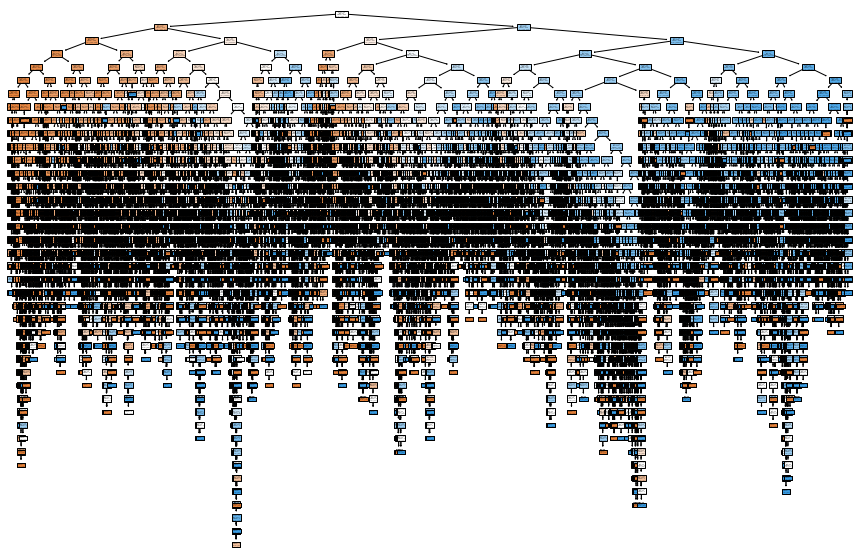

In [ ]:
# Visualize the full tree via "plot_tree" function (take about 13- 15 mins)
# These lines of code may take 12+ minutes to run 

# First, re-size the figure via matplotlib(otherwise it will be too small)
plt.figure(figsize=(15,10))

# Then call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

### Decision Tree - Pruning the full tree 

### **These lines of code could take a while to run!**

In [ ]:
# We create lists of all the values we want to search over (takw about 11 mins)
# This is called 'creating a grid'
param_grid = {
    'max_depth': [ 4, 6, 8,10], 
    'min_samples_leaf': [120,150,160,170,180,190,200],
    'min_impurity_decrease': [0,0.0005,0.0001,0.001,0.002], 
    'min_samples_split': [4,5,6,7,8,10],
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.7403806743818648
Parameter values to achieve best accuracy:  {'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 150, 'min_samples_split': 4}


In [ ]:
# Confusion matrix of "smaller" tree
y_pred = gridSearch.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")

print("Confusion Matrix of reduced tree on test data:")
confusion_matrix(y_test, y_pred)

In [ ]:
# Use the optimal parameters to run decision tree (pruned Tress)
# The parameters:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy

gridSearch = DecisionTreeClassifier(
      max_depth=8, 
      min_samples_split = 4, 
      min_samples_leaf = 150,
      min_impurity_decrease = 0.0001,
      criterion = 'gini')
gridSearch.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.0001,
                       min_samples_leaf=150, min_samples_split=4)

In [ ]:
# Get the number of nodes for the pruned tree
print('Number of nodes', gridSearch.tree_.node_count)

Number of nodes 163


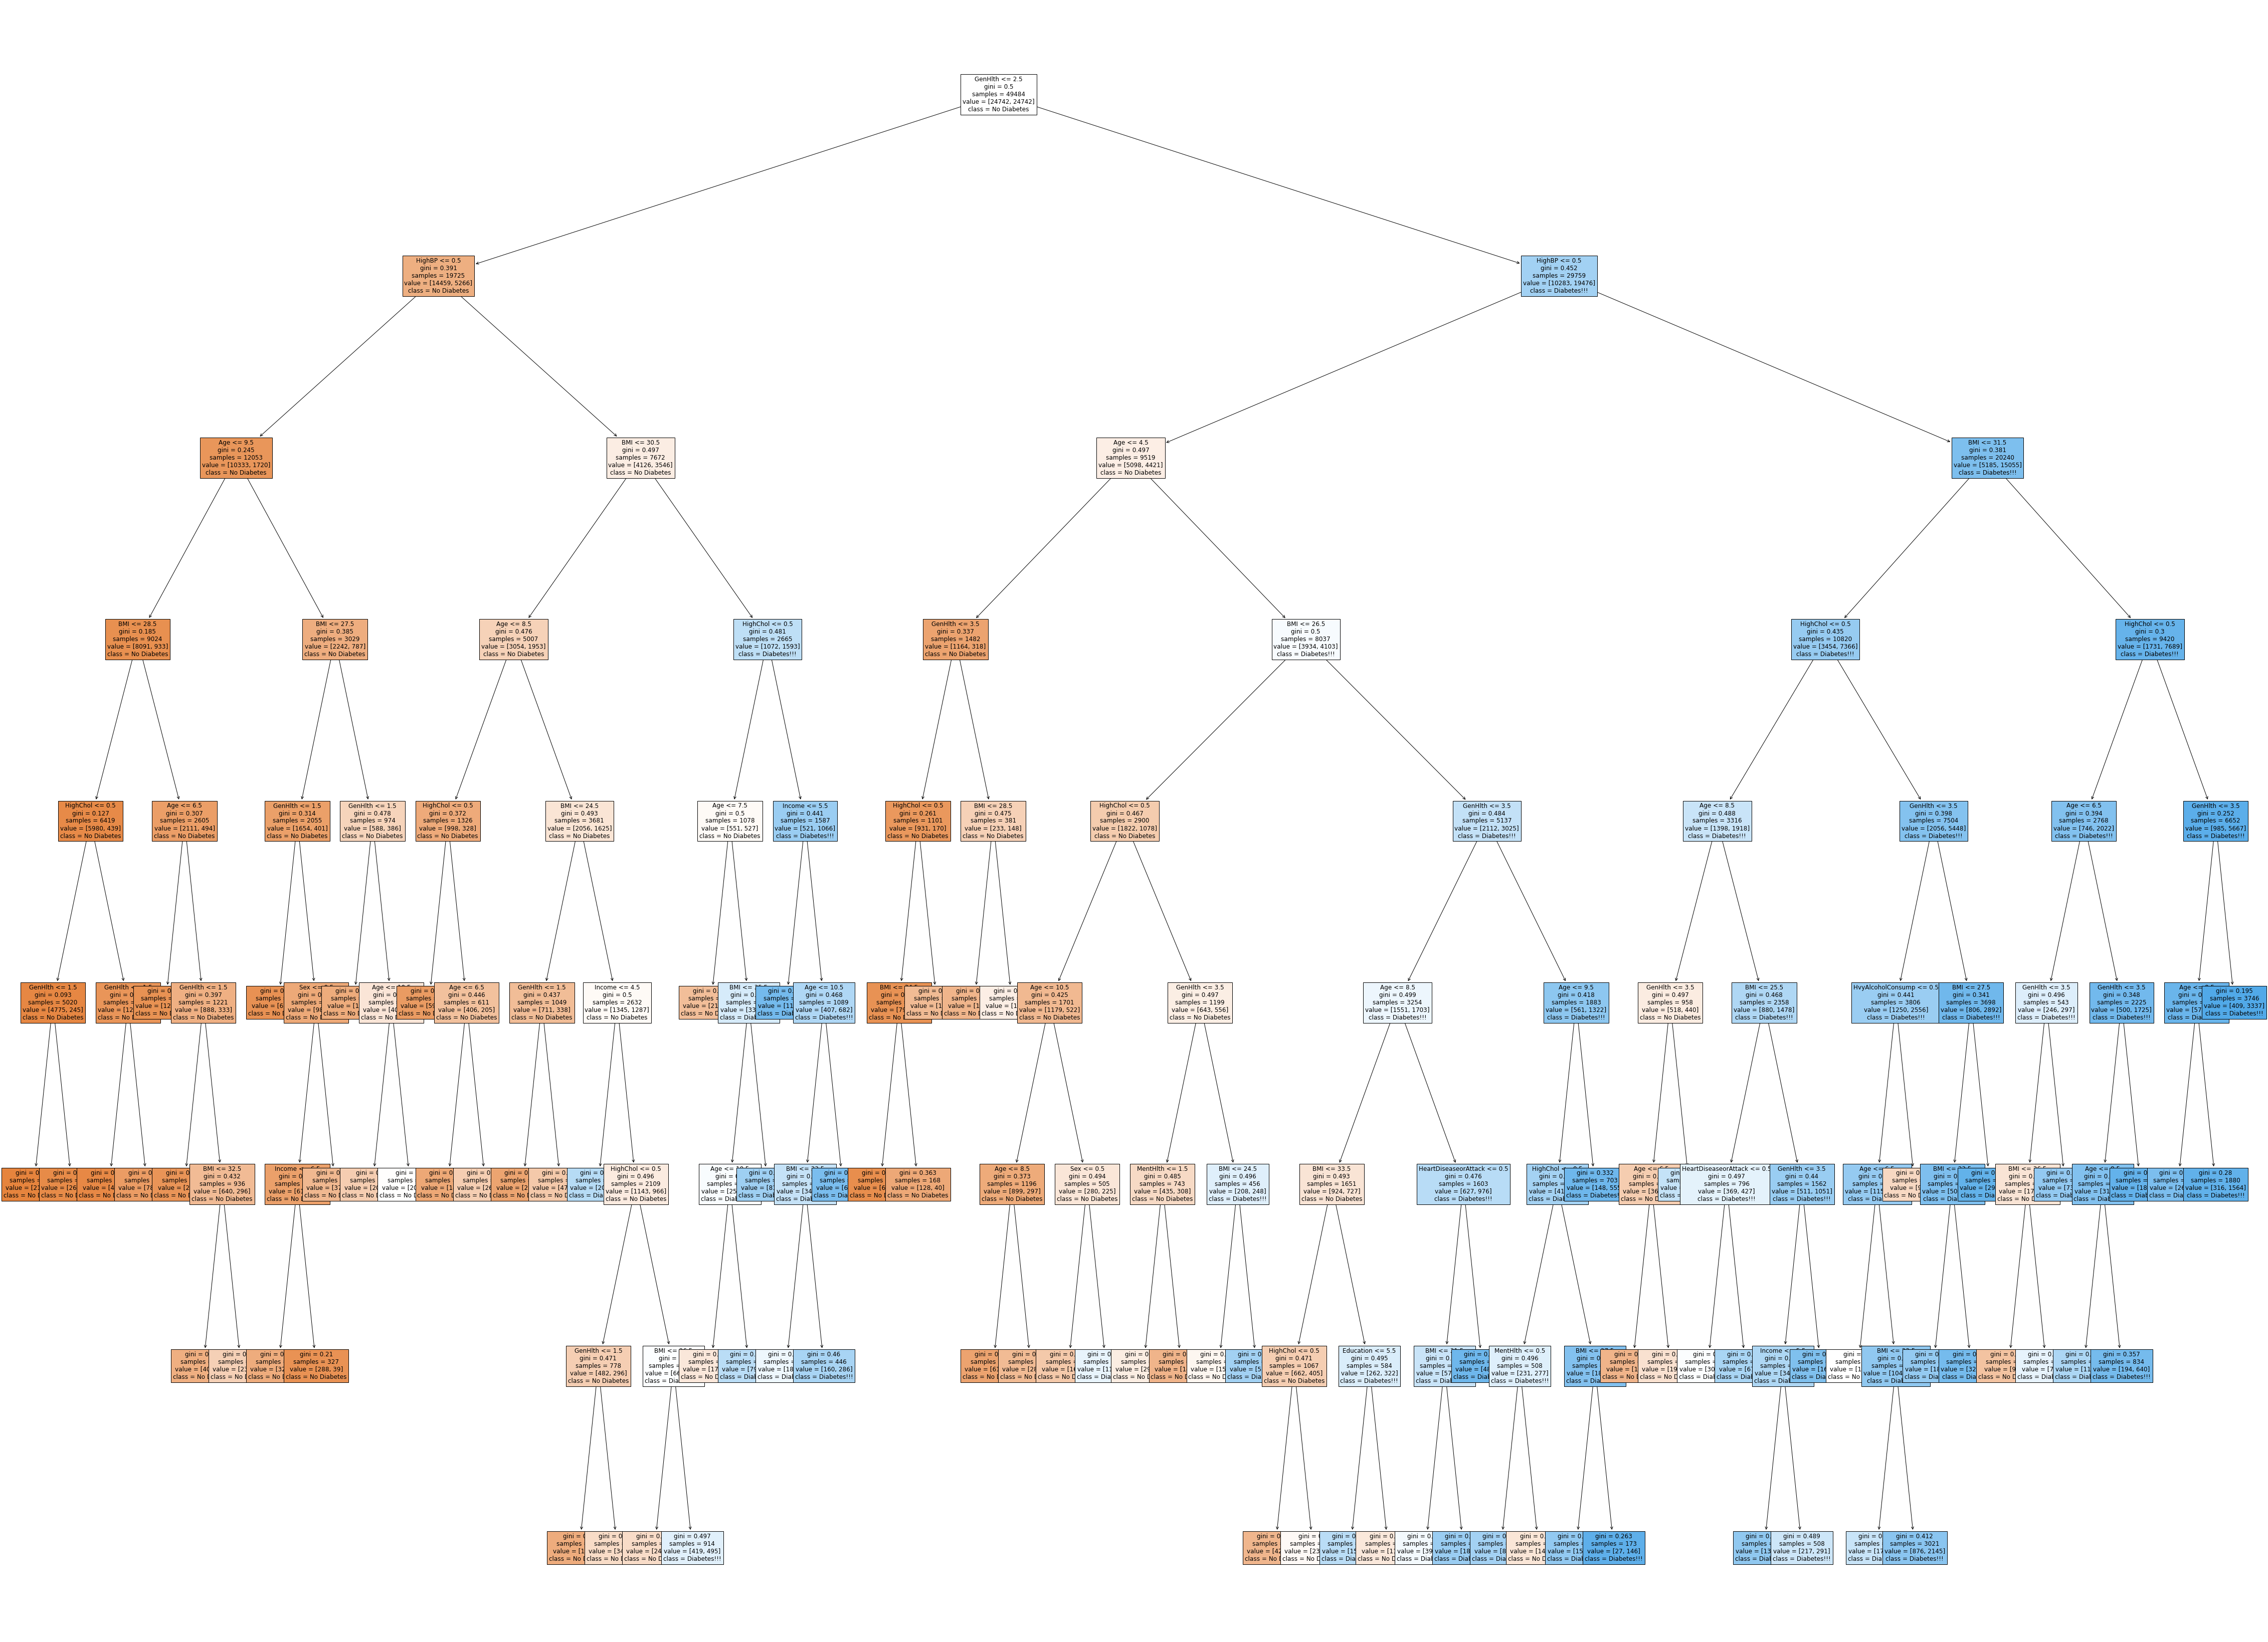

In [ ]:
# Plot the reduced tree  (Take about 27s)
fig = plt.figure(figsize=(80,60))
# define class names
#we are passing numpy array (X) which is not a dataframe and therefore, no attribute as columns

cnames = ['No Diabetes','Diabetes!!!'] 
tree.plot_tree(gridSearch, fontsize=12,feature_names= columnsnames, class_names=cnames, filled=True);

###Visualize the tree in a better way

In [ ]:
# import packages for visualization
%%capture
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

In [ ]:
# Take about 1 min
viz = dtreeviz(gridSearch,  
               x_data=X_train,
               y_data=y_train,
               target_name='Diabetes?',
               feature_names= columnsnames, 
               class_names=['No Diabetes', 'Diabetes!!!'],
               title="Decision Tree on Diabetes Survey",
               scale=1.2); 
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

## Random Forest

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

### **These lines of code could take a while to run!**

In [ ]:
# Run the RF classifier, specifying the number of trees to generate (Take about 2 mins)
# when using random forest classifiers, given they randomize over the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=5000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 150)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=150, n_estimators=5000, random_state=0)

In [ ]:
# The accuracy score, the confusion_matrix and the classification report on the random forest model
# (Take about 50s)
print(accuracy_score(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))

0.7482553753300641
[[7461 3143]
 [2196 8408]]
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     10604
         1.0       0.73      0.79      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### Feature Importance

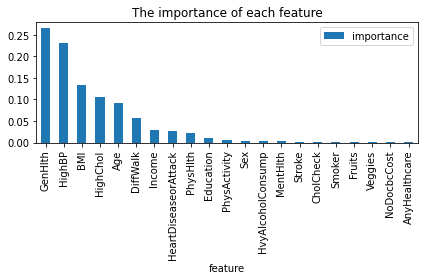

In [ ]:
# Extract importance values for each feature (columns of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': columnsnames, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature', y='importance', title='The importance of each feature')

plt.tight_layout()
plt.show()

##Logistic Regression

In [ ]:
#importing required packages for Logistic Regression
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [ ]:
# Use Logistic Regression function to fit the data
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [ ]:
# Run class y predictions
y_lrpred = lr.predict(X_test)

In [ ]:
# Get the Confusion Matrix and accuracy score
print(confusion_matrix(y_test,y_lrpred))
print(accuracy_score(y_test, y_lrpred))
print(classification_report(y_test,y_lrpred))

[[7595 3009]
 [2498 8106]]
0.7403338362881932
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10604
         1.0       0.73      0.76      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [ ]:
# Extract regressed probabilities using predict_proba
p_pred=lr.predict_proba(X_test)[:,1]
np.round(p_pred,3)

array([0.043, 0.19 , 0.772, ..., 0.449, 0.04 , 0.26 ])

In [ ]:
# Try out different cutoff values to see which cutoff value gives the highest accuracy score
# 0.5 is the best cutoff value

for c in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  p_pred_new=[1 if i > c else 0 for i in p_pred]
  print('Cutoff value:',c,'Accuracy Score:', accuracy_score(y_test, p_pred_new))

Cutoff value: 0.1 Accuracy Score: 0.5768106374952848
Cutoff value: 0.2 Accuracy Score: 0.6616842700867597
Cutoff value: 0.3 Accuracy Score: 0.7121840814786873
Cutoff value: 0.4 Accuracy Score: 0.735665786495662
Cutoff value: 0.5 Accuracy Score: 0.7403338362881932
Cutoff value: 0.6 Accuracy Score: 0.722840437570728
Cutoff value: 0.7 Accuracy Score: 0.6819124858543946
Cutoff value: 0.8 Accuracy Score: 0.6200490380988306
Cutoff value: 0.9 Accuracy Score: 0.5425311203319502


### Interpreting results

In [ ]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef},index=columnsnames))

intercept  -3.670561874131628
                         coeff
HighBP                0.620879
HighChol              0.670814
CholCheck            -0.445273
BMI                   0.067022
Smoker                0.058839
Stroke                0.140371
HeartDiseaseorAttack  0.108343
PhysActivity          0.000723
Fruits               -0.166334
Veggies              -0.026757
HvyAlcoholConsump    -1.173903
AnyHealthcare        -0.451324
NoDocbcCost          -0.224734
GenHlth               0.565757
MentHlth             -0.008359
PhysHlth              0.001475
DiffWalk              0.006625
Sex                   0.165540
Age                   0.137701
Education            -0.131466
Income               -0.040775


Text(0.5, 0, 'Importance')

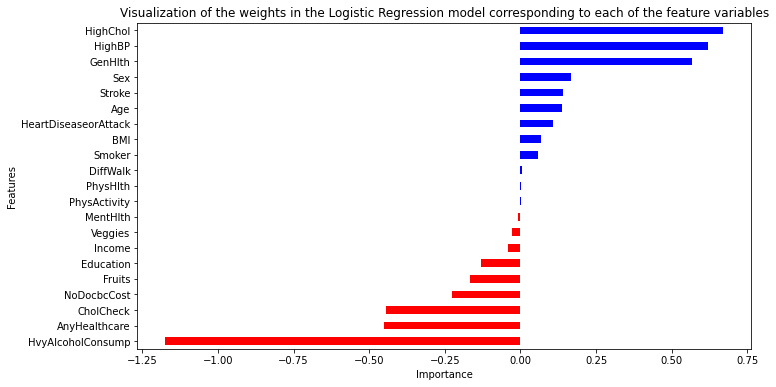

In [ ]:
# To see the weights of each original coefficients in the Logistic Regression model corresponding to each of the feature variables
features = pd.DataFrame()
features['Features'] = columnsnames
features['importance'] = lr_coef
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),title= 'Visualization of the weights in the Logistic Regression model corresponding to each of the feature variables', color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
# print exponentiated variables coefficients
from pandas.core.frame import DataFrame
for i in range(0, 21, 1):

    lr_coef1 = (math.exp(lr_coef[i]))
    print(columnsnames[i],lr_coef1) 

HighBP 1.8605633316898218
HighChol 1.9558294613230374
CholCheck 0.6406493129172424
BMI 1.0693188915788223
Smoker 1.060604280875122
Stroke 1.150700990315961
HeartDiseaseorAttack 1.1144297931357945
PhysActivity 1.0007232417324199
Fruits 0.8467630253610549
Veggies 0.9735974288140427
HvyAlcoholConsump 0.30915785540031987
AnyHealthcare 0.6367843077581027
NoDocbcCost 0.7987283962411235
GenHlth 1.7607799104278548
MentHlth 0.9916759553865493
PhysHlth 1.0014756177630797
DiffWalk 1.0066473705033252
Sex 1.1800301870895826
Age 1.147632185059186
Education 0.8768089068629081
Income 0.960044951318349


**Interpreation of the exponentiated variables coefficients:**
A positive coefficient in the logit model translates into a coefficient larger than 1 in the odds model. In the logit model, the estimated coefficient for high blood pressure is 0.6208. In the odds models, the coefficient is e^0.6208 = 1.8605. This means that an increase of a unit in high blood pressure is associated with an increase in the odds of diagnosis of diabetes by a factor of 1.8605. Conversely, an extra unit increases of  cholesterol check in 5 years decreases the odds of diagnosis of diabetes by a factor of (1 - 0.36) = 0.64.

**High blood pressure group has 86% more odds of having diabetes than non-high blood pressure group.** 

**High Cholesterol check in 5 years group has 64% fewer odds of having diabetes than non high cholesterol check in 5 years group.** 

## Neural Network

In [ ]:
# import required packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part

In [ ]:
# check each variables' datatype
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# Divide the entire dataset into X and y
y_nonscaled = diabetes_df[['Diabetes_binary']]
X_nonscaled = diabetes_df.drop(columns=['Diabetes_binary'])
X_nonscaled.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  26.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  26.0     1.0     1.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  28.0     1.0     0.0                   0.0   
4     0.0       0.0        1.0  29.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           1.0     0.0      1.0  ...            1.0          0.0      3.0   
1           0.0     1.0      0.0  ...            1.0          0.0      3.0   
2           1.0     1.0      1.0  ...            1.0          0.0      1.0   
3           1.0     1.0      1.0  ...            1.0          0.0      3.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0       5.0      30.0       0.0  1.0   4.0        6.0     8.0  
1       0.0       0.0       0.0  1.0  12.0        6.0     8.0  
2       0.0      10.0       0.0  1.0  13.0        6.0     8.0  
3       0.0       3.0       0.0  1.0  11.0        6.0     8.0  
4       0.0       0.0       0.0  0.0   8.0        5.0     8.0  

[5 rows x 21 columns]

In [ ]:
# normalize the data into [0,1] range
# MinMax = (X - Xmin) / (Xmax - Xmin)
# X2, y2 are for nerual network model
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y2 = scaleOutput.fit_transform(y_nonscaled)
X2 = scaleInput.fit_transform(X_nonscaled)

# partition data
# Xn, yn are the representation of train/split dataset for neural network classification
X2_train, X2valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [ ]:
# Check normalization worked
X2_train[0,:]

array([0.        , 0.        , 1.        , 0.13953488, 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.25      , 0.03333333,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.85714286])

###Neural Network with a single hidden layer and 2 nodes

In [ ]:
# train neural network with single hidden layer and 2 nodes
# function: MLPRegressor
# hidden_layer_sizes = (2, 4, ..., 1)  number of neurons in each hidden layer
# ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
# ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
# ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
# ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

diabetes_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1, max_iter=1000)
diabetes_nnet.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=2, max_iter=1000,
             random_state=1, solver='lbfgs')

In [ ]:
# Make diabetes binary predictions
# We don't need the inverse_transform function since all inputs are categorical
ynn_pred = diabetes_nnet.predict(X2valid)
ynn_pred

array([0.093238  , 0.58472622, 0.40852738, ..., 0.3878583 , 0.51352852,
       0.80478911])

In [ ]:
# Set up the cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn_pred_new=[1 if i > cutoff else 0 for i in ynn_pred]

In [ ]:
# confusion matrix with different cutoff
confusion_matrix(y2_valid,ynn_pred_new)

array([[7486, 3195],
       [2066, 8461]])

In [ ]:
# accuracy score with different cutoff
accuracy_score(y2_valid, ynn_pred_new)

0.7519332327423613

In [ ]:
# Try out different cutoff values to see which cutoff value gives the highest accuracy score
# 0.5 is the best cutoff value

for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn_pred_new=[1 if i > z else 0 for i in ynn_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y2_valid, ynn_pred_new))


Cutoff value: 0.1 Accuracy Score: 0.621982270841192
Cutoff value: 0.2 Accuracy Score: 0.6837042625424368
Cutoff value: 0.3 Accuracy Score: 0.7223689173896642
Cutoff value: 0.4 Accuracy Score: 0.7430215013202565
Cutoff value: 0.5 Accuracy Score: 0.7519332327423613
Cutoff value: 0.6 Accuracy Score: 0.743964541682384
Cutoff value: 0.7 Accuracy Score: 0.7073274236137307
Cutoff value: 0.8 Accuracy Score: 0.6226423990946812
Cutoff value: 0.9 Accuracy Score: 0.513202565069785


###Neural Network with a single hidden layer and 5 nodes

In [ ]:
# train neural network with single hidden layer and 5 hidden nodes
diabetes2_nnet = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
diabetes2_nnet.fit(X2_train, y2_train)

# Make diabetes binary predictions
ynn5_pred = diabetes2_nnet.predict(X2valid)

# Test out different cut-off value
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn5_pred_new=[1 if i > z else 0 for i in ynn5_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y2_valid, ynn5_pred_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cutoff value: 0.1 Accuracy Score: 0.6147208600528102
Cutoff value: 0.2 Accuracy Score: 0.6804036212749905
Cutoff value: 0.3 Accuracy Score: 0.7211429649188985
Cutoff value: 0.4 Accuracy Score: 0.7430686533383629
Cutoff value: 0.5 Accuracy Score: 0.751886080724255
Cutoff value: 0.6 Accuracy Score: 0.7446246699358733
Cutoff value: 0.7 Accuracy Score: 0.7057714070162203
Cutoff value: 0.8 Accuracy Score: 0.6233025273481705
Cutoff value: 0.9 Accuracy Score: 0.5100433798566578


In [ ]:
# Set up the best cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn5_pred_new=[1 if i > cutoff else 0 for i in ynn5_pred]

print(confusion_matrix(y2_valid,ynn5_pred_new));
print(accuracy_score(y2_valid, ynn5_pred_new));

[[7499 3182]
 [2080 8447]]
0.751886080724255


### Neural Network with 3 hidden layers and 5 nodes (Deep Learning)

In [ ]:
# train neural network with single hidden layer and 5 hidden nodes
diabetes3_nnet = MLPRegressor(hidden_layer_sizes=(5,5,5,), activation='logistic', solver='lbfgs', random_state=1)
diabetes3_nnet.fit(X2_train, y2_train)

# Make diabetes binary predictions
ynn555_pred = diabetes3_nnet.predict(X2valid)

# Test out different cut-off value
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn555_pred_new=[1 if i > z else 0 for i in ynn555_pred]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y2_valid, ynn555_pred_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Cutoff value: 0.1 Accuracy Score: 0.625377216144851
Cutoff value: 0.2 Accuracy Score: 0.6866748396831385
Cutoff value: 0.3 Accuracy Score: 0.722840437570728
Cutoff value: 0.4 Accuracy Score: 0.7445775179177668
Cutoff value: 0.5 Accuracy Score: 0.7525933609958506
Cutoff value: 0.6 Accuracy Score: 0.7464164466239155
Cutoff value: 0.7 Accuracy Score: 0.7063843832516031
Cutoff value: 0.8 Accuracy Score: 0.6221237268955111
Cutoff value: 0.9 Accuracy Score: 0.5202753677857412


In [ ]:
# Set up the best cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn555_pred_new=[1 if i > cutoff else 0 for i in ynn555_pred]

print(confusion_matrix(y2_valid,ynn555_pred_new));
print(accuracy_score(y2_valid, ynn555_pred_new));

[[7482 3199]
 [2048 8479]]
0.7525933609958506


## Support Vector Machine (SVM)

In [ ]:
# import the SVM model from Sklearn
from sklearn.svm import SVC

# Call the SVC function to fit the data
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
# The accuracy score, confusion matrix and classification report on SVM model
svc_pred = svc_model.predict(X_test)
print(accuracy_score(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

0.7499528479818937
[[7340 3264]
 [2039 8565]]
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10604
         1.0       0.72      0.81      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



## Classification Models performance

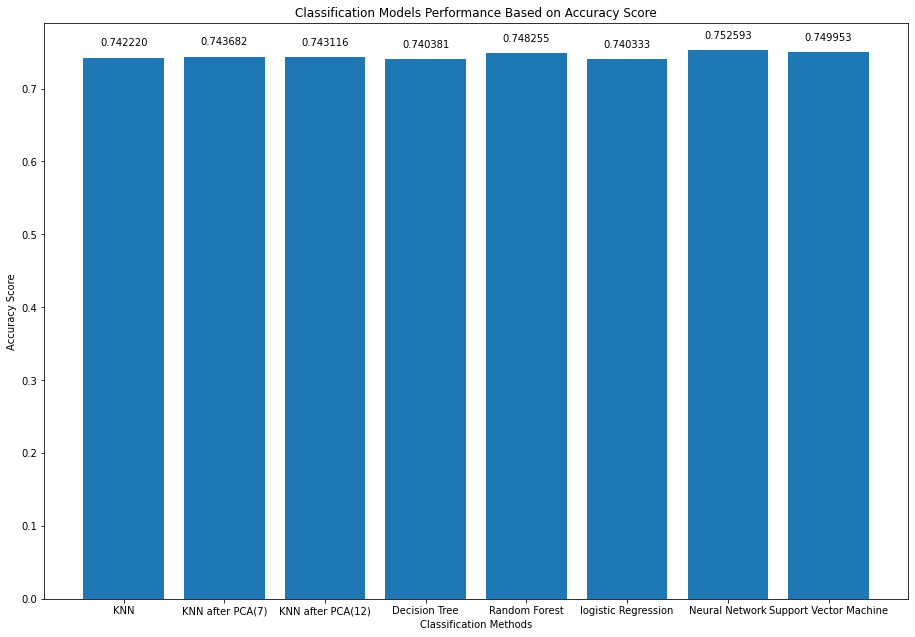

In [ ]:
# Plotting the bar grpah of all classification models performance on this dataset
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
langs = ['KNN', 'KNN after PCA(7)', 'KNN after PCA(12)','Decision Tree', 'Random Forest','logistic Regression','Neural Network','Support Vector Machine']
result = [0.742220 ,0.743682,0.743116,0.740381,0.748255, 0.740333, 0.752593,0.749953]
ax.bar(langs,result)
ax.set_ylabel('Accuracy Score');
ax.set_xlabel('Classification Methods');
ax.set_title('Classification Models Performance Based on Accuracy Score');

# formatting of the graph
def add_value_labels(ax, spacing=10):
    
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:2f}".format(y_value)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)  
add_value_labels(ax)
plt.show()

## Prediction on diabetes by using one of the members (otto) info

In [ ]:
# define otto's info for each variable
otto = pd.DataFrame([
{
 'HighBP': 0,
 'HighChol':0,
 'CholCheck':0,
 'BMI':26,
 'Smoker':0,
 'Stroke':0,
 'HeartDiseaseorAttack':0,
 'PhysActivity':0,
 'Fruits':1,
 'Veggies':0,
 'HvyAlcoholConsump':0,
 'AnyHealthcare':1,
 'NoDocbcCost':0,
 'GenHlth':4,
 'MentHlth':4,
 'PhysHlth':0,
 'DiffWalk':0,
 'Sex':1,
 'Age':1,
 'Education':4,
 'Income':7,
 }
 ])

In [ ]:
# Use SVM model to predict whether Otto will have diabetes or not
svc_pred = svc_model.predict(otto)
print('Otto diabetes binary:', svc_pred)

Otto diabetes binary: [0.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Base on the SVM model prediction, Otto doesn't have diabetes!!! Great news.**